# 2 Data wrangling<a id='2_Data_wrangling'></a>

# 2.1 Introduction<a id='2.1_Introduction'></a>

This step focuses on collecting data, organizing it, and making sure it's well defined. It can also be noted that some data cleaning can be done at this stage, but it's important not to be overzealous in the cleaning before we've explored the data to better understand it.

### 2.1.1 Recap Of Data Science Problem<a id='2.1.1_Recap_Of_Data_Science_Problem'></a>

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry, and now you are invited to join the challenge.

The objective of this notebook is to explore data set from [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/data)

The goal is to predict the probability that an online transaction is fraudulent, as denoted by the binary target `isFraud`.

The first step here is to wrangle the data to better understand the width and breadth of the data.

## 2.2 Import Libraries<a id='2.2_Import Libraries'></a>

In [1]:
#Import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
import os
import pickle

## 2.3 Load The Data<a id='2.3_Load_The_Data'></a>

In [2]:
# load the data
train_identity = pd.read_csv('/train_identity.csv')
train_transaction = pd.read_csv('/train_transaction.csv')

In [3]:
# call info method to see a summary of the identity data
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [4]:
# call the head method to see a few rows of the identity data
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
# call the info method to see a summary of the transaction data
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
# call the head method to see a few rows of the transaction data
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# function to reduce memory(transaction data takes more 1.7GB of memory)
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
# merge transaction and identity datasets
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [9]:
# apply the reduce_mem_usage function to reduce memory
df = reduce_mem_usage(df)

Mem. usage decreased to 2559.77 Mb (0.5% reduction)


In [10]:
# call the head method to see a few rows of the merged data
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int16(1), int32(2), int8(1), object(31)
memory usage: 1.9+ GB


## 2.4 Explore The Data<a id='2.4_Explore_The_Data'></a>

### 2.4.1 Calculate Missing Values Per Column<a id='2.4.1_Calculate_Missing_Values_Per_Column'></a>

In [12]:
# function to calculate percentage of missing values
# for each column
def missing_values_pct(df):
    pd.options.display.max_rows = 100 # number of rows to print since we have more columns
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns = ['count', '%']
    sorted_ms = missing.sort_values(by='%', ascending=False).head(50)
    return sorted_ms

In [13]:
missing_values_pct(df)

,count,%
id_24,585793,99.196159
id_25,585408,99.130965
id_07,585385,99.127070
id_08,585385,99.127070
id_21,585381,99.126393
id_26,585377,99.125715
id_27,585371,99.124699
id_23,585371,99.124699
id_22,585371,99.124699
dist2,552913,93.628374


As we can see, the first 50 columns have over 80% missing values.

### 2.4.2 Categorical Features<a id='2.4.2_Categorical_Features'></a>

In [14]:
# select datatypes of 'object'
cat_cols = df.select_dtypes('object')
cat_cols.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


#### 2.4.2.1 List categorical features<a id='2.4.2.1_List_categorical_features'></a>

In [15]:
# list of categorical columns
cat_cols.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

#### 2.4.2.2 Count of distinct Products<a id='2.4.2.2_Count_of_distinct_Products'></a>

In [16]:
df['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

Majority of the products offered to customers are `W`

#### 2.4.2.3 Count of distinct Banks<a id='2.4.2.3_Count_of_distinct_Banks'></a>

In [17]:
df['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

It can be infered from above that most customers use the `visa` card and then followed by `mastercard`

#### 2.4.2.4 Count of distinct Card Type<a id='2.4.2.4_Count_of_distinct_Card_Type'></a>

In [18]:
df['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

Most customers prefer to use their debit cards for transactions

#### 2.4.2.5 Count of Email Providers<a id='2.4.2.5_Count_of_Email_Providers'></a>

In [19]:
df['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
roadrunner.com         305
windstream.net         305
hotmail.es             305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

The most prefered mode of communication is the google account `gmail.com`. Glancing through we see duplicates, like `gmail` and `gmail.com`. We have to group these into one.

In [20]:
df['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [21]:
df['R_emaildomain'].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
prodigy.net.mx        207
ymail.com             207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

In [22]:
# calculate the number of times 'P_emaildomain' is not equal to 'R_emaildomain'
(df.P_emaildomain != df.R_emaildomain).count()

590540

In [23]:
#Filter the dataframe for rows where 'P_emaildomain' and 'R_emaildomain' are different,
#group that by 'R_emaildomain' and perform `value_counts` on the 'P_emaildomain'
(df[df.P_emaildomain != df.R_emaildomain]
 .groupby('R_emaildomain')['P_emaildomain']
 .value_counts())

R_emaildomain  P_emaildomain
aim.com        gmail.com        9
               aol.com          2
               anonymous.com    1
               comcast.net      1
               hotmail.com      1
                               ..
ymail.com      cfl.rr.com       1
               comcast.net      1
               cox.net          1
               live.com         1
               msn.com          1
Name: P_emaildomain, Length: 591, dtype: int64

In [50]:
# percent of fraud by email address
temp_df = pd.DataFrame(df[df['isFraud']==1]['P_emaildomain'].value_counts()/
                       df['P_emaildomain'].value_counts())
temp_df.sort_values(by='P_emaildomain', ascending=False)

,P_emaildomain
protonmail.com,0.407895
mail.com,0.189624
outlook.es,0.130137
aim.com,0.126984
outlook.com,0.094584
hotmail.es,0.065574
live.com.mx,0.054740
hotmail.com,0.052950
gmail.com,0.043542
yahoo.fr,0.034965


`protonmail.com` has the highest number of fraud related cases contributing about 41%

In [35]:
# mapping email address to check the percent
# of fraud by email addresses
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 
          'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 
          'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 
          'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 
          'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 
          'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 
          'hotmail.com': 'microsoft', 'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 
          'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 
          'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 
          'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 
          'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 
          'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 
          'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other', 
          'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft',
          'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 
          'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 
          'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain', 'R_emaildomain']:
    df[c + '_bin'] = df[c].map(emails)
    #df1[c + '_suffix'] = df1[c].map(lambda x: str(x).split('.')[-1])
    #df1[c + '_suffix'] = df1[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [36]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,P_emaildomain_bin,R_emaildomain_bin
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,microsoft,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yahoo,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,google,NaN


In [38]:
df['P_emaildomain_bin'].value_counts()

google         228851
yahoo          109149
microsoft       59477
other           52868
aol             28604
apple            8225
att              7210
spectrum         1046
centurylink       654
Name: P_emaildomain_bin, dtype: int64

In [41]:
df['R_emaildomain_bin'].value_counts()

google         57242
microsoft      33604
other          24433
yahoo          14653
aol             3737
apple           2172
att             1189
spectrum         156
centurylink      105
Name: R_emaildomain_bin, dtype: int64

In [51]:
# percent of fraud by binned email address
temp_df1 = pd.DataFrame(df[df['isFraud']==1]['P_emaildomain_bin'].value_counts()/
                       df['P_emaildomain_bin'].value_counts())
temp_df1.sort_values(by='P_emaildomain_bin', ascending=False)

,P_emaildomain_bin
microsoft,0.053298
google,0.043496
apple,0.028936
other,0.025914
spectrum,0.023901
aol,0.022969
yahoo,0.022052
centurylink,0.013761
att,0.005964


When the data was binned, `microsoft` had the highest related fraud cases with about 5.3%. `google` came in second with about 4.3% fraud cases.

#### 2.4.2.6 Use of Device for Transaction<a id='2.4.2.6_Use_of_Device_for_Transaction'></a>

In [52]:
df['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

More transactions were done on the desktop devices relative to mobile devices

#### 2.4.2.7 Card type and company<a id='2.4.2.7_Card_type_and_company'></a>

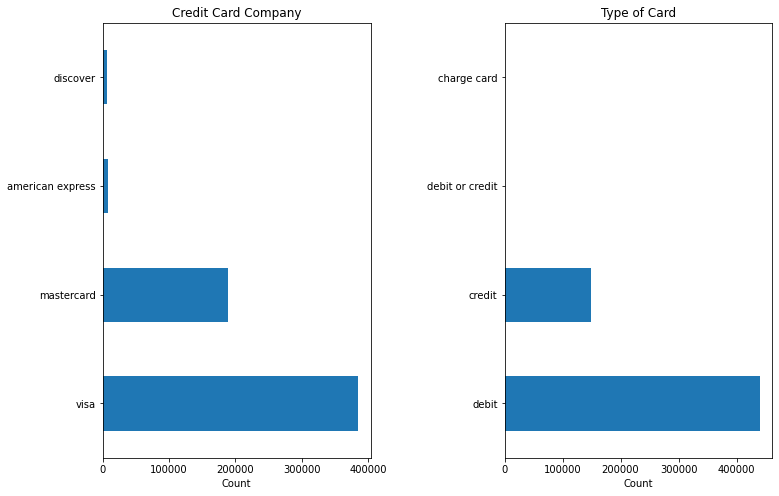

In [55]:
# distribution of 'card4' and 'card6'
fig, ax = plt.subplots(1, 2, figsize=(12,8))
df.card4.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Credit Card Company')
ax[0].set_xlabel('Count')
df.card6.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Type of Card')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

### 2.4.3 Numeric Features<a id='2.4.3_Numeric_Features'></a>

In [56]:
# Call df's `describe` method for a statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
id_22,5169.0,1.600271e+01,6.897665e+00,10.000,14.000,14.000,14.00,4.400000e+01
id_24,4747.0,1.280093e+01,2.372447e+00,11.000,11.000,11.000,15.00,2.600000e+01
id_25,5132.0,3.296089e+02,9.746109e+01,100.000,321.000,321.000,371.00,5.480000e+02
id_26,5163.0,1.490703e+02,3.210199e+01,100.000,119.000,149.000,169.00,2.160000e+02


In [57]:
# distribution of target variable
df['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [59]:
df['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

Maximum transaction amount was 31937.391 and the minimum was 0.251

In [60]:
# convert TransactionDT to datetime
# was believed the starting date was in 2017
import datetime
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
df['TransactionDT'] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

In [61]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,P_emaildomain_bin,R_emaildomain_bin
0,2987000,0,2017-12-02 00:00:00,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,2017-12-02 00:00:01,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN
2,2987002,0,2017-12-02 00:01:09,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,microsoft,NaN
3,2987003,0,2017-12-02 00:01:39,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yahoo,NaN
4,2987004,0,2017-12-02 00:01:46,50.0,H,4497,514.0,150.0,mastercard,102.0,...,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,google,NaN


In [62]:
# extract year, month, day, hour, minutes and seconds from 'TransactionDT'
df['TransactionDT_Month'] = df.TransactionDT.dt.month
df['TransactionDT_Day'] = df.TransactionDT.dt.day
df['TransactionDT_Year'] = df.TransactionDT.dt.year
df['TransactionDT_Week Number'] = df.TransactionDT.dt.isocalendar().week 
df['TransactionDT_Day Of Week'] = df.TransactionDT.dt.dayofweek
df['TransactionDT_Day Name']= pd.to_datetime(df['TransactionDT']).dt.day_name() 
df['TransactionDT_Month Name']=pd.to_datetime(df['TransactionDT']).dt.month_name()
df['TransactionDT_Hour'] = df.TransactionDT.dt.hour
df['TransactionDT_Minute'] = df.TransactionDT.dt.minute
df['TransactionDT_Second'] = df.TransactionDT.dt.second

In [63]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 446 columns):
 #    Column                     Non-Null Count   Dtype         
---   ------                     --------------   -----         
 0    TransactionID              590540 non-null  int32         
 1    isFraud                    590540 non-null  int8          
 2    TransactionDT              590540 non-null  datetime64[ns]
 3    TransactionAmt             590540 non-null  float64       
 4    ProductCD                  590540 non-null  object        
 5    card1                      590540 non-null  int16         
 6    card2                      581607 non-null  float64       
 7    card3                      588975 non-null  float64       
 8    card4                      588963 non-null  object        
 9    card5                      586281 non-null  float64       
 10   card6                      588969 non-null  object        
 11   addr1                      524834 non

In [64]:
df['TransactionDT_Day Of Week'].value_counts()

5    98502
4    86377
1    85433
3    85356
2    84815
6    79834
0    70223
Name: TransactionDT_Day Of Week, dtype: int64

In [65]:
# check missing values after adding new columns
missing_values_pct(df)

,count,%
id_24,585793,99.196159
id_25,585408,99.130965
id_08,585385,99.127070
id_07,585385,99.127070
id_21,585381,99.126393
id_26,585377,99.125715
id_27,585371,99.124699
id_23,585371,99.124699
id_22,585371,99.124699
dist2,552913,93.628374


In [73]:
# Drop columns with missing values using a threshold
# Drop any column with more than 90% missing values
threshold = len(df) * 0.10
df = df.dropna(thresh=threshold, axis=1)

In [74]:
missing_values_pct(df)

,count,%
D13,528588,89.509263
D14,528353,89.469469
D12,525823,89.041047
id_04,524216,88.768923
id_03,524216,88.768923
D6,517353,87.606767
id_33,517251,87.589494
id_10,515614,87.312290
id_09,515614,87.312290
D9,515614,87.312290


Having dropped rows missing the desired values, what degree of missingness do you have for the remaining rows?

In [75]:
pd.options.display.max_rows = 100 # number of rows to print since we have more columns
missing = pd.concat([df.isnull().sum(axis=1), 100 * df.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(20)

,count,%
522237,328,75.576037
522280,324,74.654378
31095,322,74.193548
474324,318,73.271889
456105,315,72.580645
456111,315,72.580645
474339,314,72.350230
474270,312,71.889401
456132,311,71.658986
474259,311,71.658986


## 2.5 Save data<a id='2.5_Save_data'></a>

In [76]:
df.shape

(590540, 434)

In [78]:
# function to save file

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
                
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)

In [ ]:
# save the data to a new csv file
datapath = '/Capstone Project3/'
save_file(df, 'df_cleaned.csv', datapath)